In [1]:
import pandas as pd
import nibabel
import numpy as np
import os
import glob
import re

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Add previous directory
import sys 
sys.path.append('..')

# import loader
import loader

In [8]:
landmark_dataset = loader.NiftiLandmarksDataset(csv_file="/media/df3-dafna/Netanell/TCD_ToAnnotate/Points.xlsx",
                                    seg_dir='/media/df3-dafna/Netanell/Fetal_SliceSelect_DB_all/',
                                    nii_dir='/media/df3-dafna/Netanell/Fetal_SliceSelect_DB_all/',
                                    filter_quality=None,
                                    only_tag=True,
                                    transform=None)


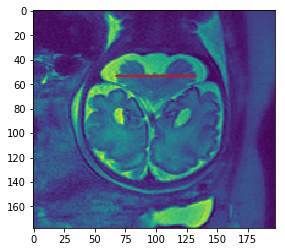

In [16]:
for i, data_elem in enumerate(landmark_dataset):
    fn = data_elem["filename"]
    tcd_img = data_elem["image"][int(data_elem['TCD_Selection'] - 1),:,:]
    plt.figure()
    plt.imshow(tcd_img)
    plt.plot(data_elem["landmarks"][:,1], data_elem["landmarks"][:,0], 'r-')
    break

In [3]:
from torchvision import models

In [4]:
import models

In [5]:
from easydict import EasyDict as edict


config = edict()

config.OUTPUT_DIR = ''
config.LOG_DIR = ''
config.DATA_DIR = ''
config.GPUS = '0'
config.WORKERS = 4
config.PRINT_FREQ = 20

# Cudnn related params
config.CUDNN = edict()
config.CUDNN.BENCHMARK = True
config.CUDNN.DETERMINISTIC = False
config.CUDNN.ENABLED = True

# pose_resnet related params
POSE_RESNET = edict()
POSE_RESNET.NUM_LAYERS = 50
POSE_RESNET.DECONV_WITH_BIAS = False
POSE_RESNET.NUM_DECONV_LAYERS = 3
POSE_RESNET.NUM_DECONV_FILTERS = [256, 256, 256]
POSE_RESNET.NUM_DECONV_KERNELS = [4, 4, 4]
POSE_RESNET.FINAL_CONV_KERNEL = 1
POSE_RESNET.TARGET_TYPE = 'gaussian'
POSE_RESNET.HEATMAP_SIZE = [64, 64]  # width * height, ex: 24 * 32
POSE_RESNET.SIGMA = 2

MODEL_EXTRAS = {
    'pose_resnet': POSE_RESNET,
}

# common params for NETWORK
config.MODEL = edict()
config.MODEL.NAME = 'pose_resnet'
config.MODEL.INIT_WEIGHTS = True
config.MODEL.PRETRAINED = "/home/netanell/.torch/models/resnet50-19c8e357.pth"
config.MODEL.NUM_JOINTS = 16
config.MODEL.IMAGE_SIZE = [256, 256]  # width * height, ex: 192 * 256
config.MODEL.EXTRA = MODEL_EXTRAS[config.MODEL.NAME]

config.MODEL.STYLE = 'pytorch'


In [6]:
models.get_pose_net(config, True, "/home/netanell/.torch/models/resnet50-19c8e357.pth")

PoseResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bi